In [35]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("Crimes2022.csv")

In [36]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [38]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [39]:
# 'ID' and 'Case Number' are not important for our analysis or model prediction, and are not useful for feature engineering.

# 'Updated On' is not important for the model or feature engineering because it does not represent the actual time the crime occurred.

# It is also irrelevant for analysis since our goal is to predict arrests, not to analyze trends in reporting delays.

# 'Location' is not important because we already have 'Latitude' and 'Longitude', which provide the same information.

df.drop(columns=["ID", "Case Number", "Updated On", "Location","Block","Description"], inplace=True)


In [40]:
df.isnull().sum()

Date                       0
IUCR                       0
Primary Type               0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Latitude                4667
Longitude               4667
dtype: int64

In [41]:
# I will drop them because it won't be accurate to replace them with the median, and 4667 is not a large number of rows compared to the dataset.
df.dropna(inplace=True)

In [42]:
df.isnull().sum()
# data is clean 

Date                    0
IUCR                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
dtype: int64

In [43]:
df.duplicated().sum()

379

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
cols_to_check = ['Beat', 'District','Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']
Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = ((df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR)))

df = df[~outliers_mask.any(axis=1)].reset_index(drop=True)

In [46]:

print (df['Location Description'].nunique())
print (df['Primary Type'].nunique())
print (df['IUCR'].nunique())
print (df['FBI Code'].nunique())


134
31
303
26


In [47]:
from sklearn.preprocessing import LabelEncoder
# encoding 
# No encoding for 'Description' because it has 283 unique values, and I'm not sure it would be good for the model. I will consider it during feature selection.

le_primary = LabelEncoder()
le_location = LabelEncoder()
le_iucr = LabelEncoder()
le_fbi = LabelEncoder()

# Fit and transform
df['Primary Type'] = le_primary.fit_transform(df['Primary Type'])
df['Location Description'] = le_location.fit_transform(df['Location Description'])
df['IUCR'] = le_iucr.fit_transform(df['IUCR'].astype(str))
df['FBI Code'] = le_fbi.fit_transform(df['FBI Code'])
# Binary conversion
#encoding 
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)

In [48]:
df.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,1/14/2022 15:55,165,22,101,0,1,724,7,16.0,68,20,1170805.0,1860170.0,2022,41.771782,-87.649437
1,8/5/2022 21:00,83,27,16,1,0,324,3,5.0,69,13,1185135.0,1857211.0,2022,41.763338,-87.597001
2,8/14/2022 14:00,85,27,101,0,0,1621,16,39.0,11,13,1138383.0,1937953.0,2022,41.985875,-87.766404
3,11/10/2022 3:47,68,30,118,0,0,733,7,17.0,68,11,1169903.0,1856822.0,2022,41.762615,-87.652840
4,2/19/2022 10:36,230,2,76,1,1,1211,12,26.0,24,5,1156861.0,1906972.0,2022,41.900506,-87.699285


In [49]:
#working on data columns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour 
df.drop(columns=['Date'], inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232154 entries, 0 to 232153
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   IUCR                  232154 non-null  int32  
 1   Primary Type          232154 non-null  int32  
 2   Location Description  232154 non-null  int32  
 3   Arrest                232154 non-null  int32  
 4   Domestic              232154 non-null  int32  
 5   Beat                  232154 non-null  int64  
 6   District              232154 non-null  int64  
 7   Ward                  232154 non-null  float64
 8   Community Area        232154 non-null  int64  
 9   FBI Code              232154 non-null  int32  
 10  X Coordinate          232154 non-null  float64
 11  Y Coordinate          232154 non-null  float64
 12  Year                  232154 non-null  int64  
 13  Latitude              232154 non-null  float64
 14  Longitude             232154 non-null  float64
 15  

In [51]:
# Removing repeated or unuseful columns because they are similar to other columns

# Dropping the 'Year' column because all values are 2022

# 'X Coordinate' and 'Y Coordinate' are equivalent to 'Latitude' and 'Longitude'

# 'FBI Code' is redundant with 'IUCR' and 'Primary Type'

df.drop(columns=['Year', 'X Coordinate', 'Y Coordinate', 'FBI Code'], inplace=True)

In [52]:


df = df[
    (df["Latitude"]  <  45) & (df["Latitude"]  >  40) &
    (df["Longitude"] < -85) & (df["Longitude"] > -90) &
    (df["DayOfWeek"]  >= 0)  & (df["DayOfWeek"]  <= 6)  &  
    (df["Hour"]       >= 0)  & (df["Hour"]       <= 23) &  
    (df["Day"] >= 1)  & (df["Day"] <= 31)  & (df['District'] <= 25 )  
]

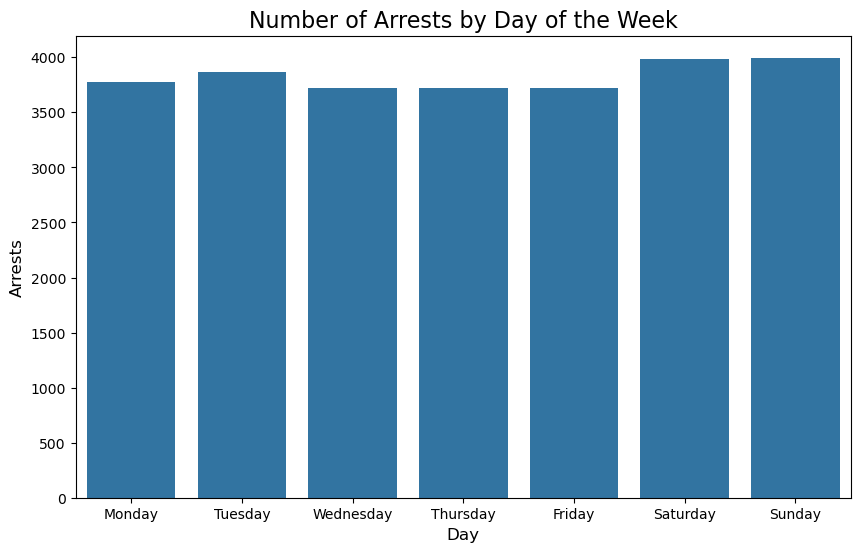

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
arrest_counts = df.groupby('DayOfWeek')['Arrest'].sum().reset_index()

arrest_counts['DayOfWeek'] = arrest_counts['DayOfWeek'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Arrest', data=arrest_counts)

plt.title('Number of Arrests by Day of the Week', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Arrests', fontsize=12)
plt.show()
# Saturday

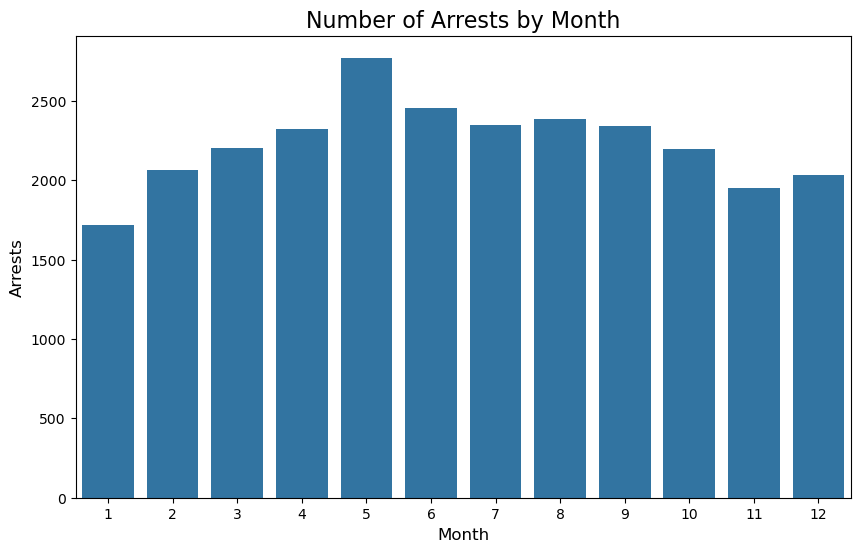

In [54]:
arrest_monthly = df.groupby('Month')['Arrest'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Arrest', data=arrest_monthly)

plt.title('Number of Arrests by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Arrests', fontsize=12)

plt.show() 
# Month 5 has the highest number of arrests

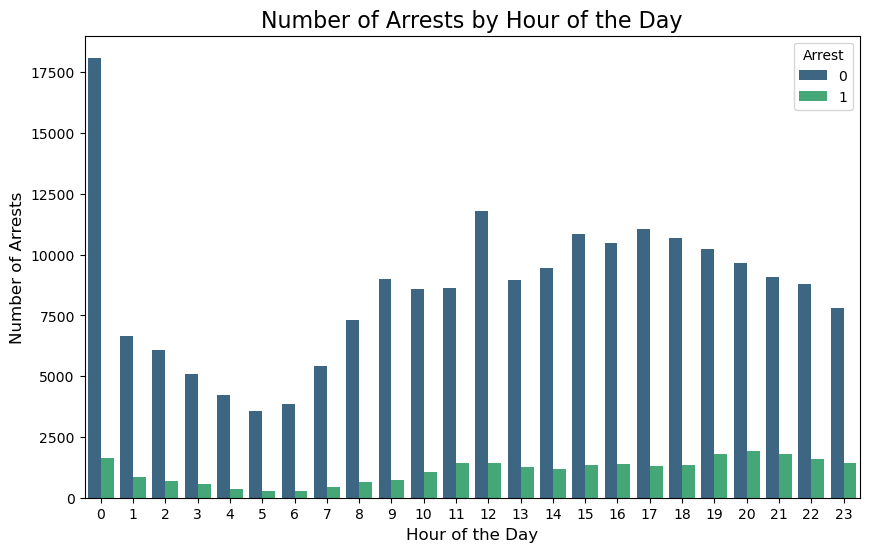

In [55]:
plt.figure(figsize=(10, 6))

# Create a countplot to visualize the number of arrests and non-arrests by hour
sns.countplot(data=df, x='Hour', hue='Arrest', palette='viridis')

# Title and labels
plt.title('Number of Arrests by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)

# Display the plot
plt.show()
# 20
# 0

In [56]:
# Find the most frequent Ward for Arrest = 1 (arrests) and Arrest = 0 (non-arrests)
most_frequent_ward_arrest = df[df['Arrest'] == 1]['Ward'].mode()[0]
most_frequent_ward_no_arrest = df[df['Arrest'] == 0]['Ward'].mode()[0]

print(f'Most frequent Ward for arrests: {most_frequent_ward_arrest}')
print(f'Most frequent Ward for non-arrests: {most_frequent_ward_no_arrest}')


Most frequent Ward for arrests: 28.0
Most frequent Ward for non-arrests: 42.0


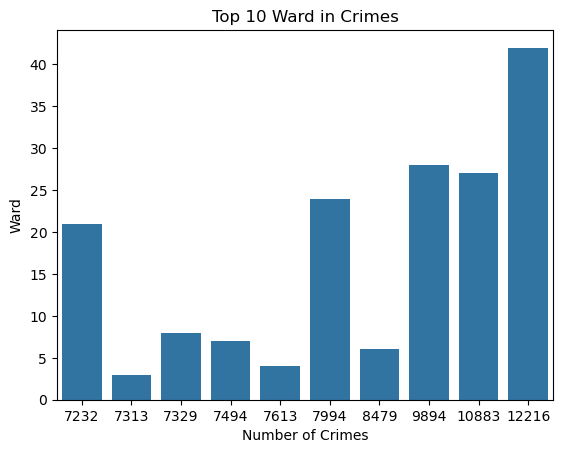

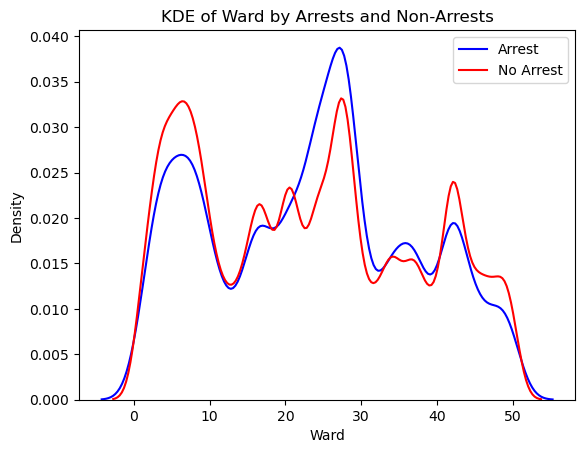

In [57]:
top_types = df['Ward'].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title('Top 10 Ward in Crimes')
plt.xlabel('Number of Crimes')
plt.show()

sns.kdeplot(df[df['Arrest'] == 1]['Ward'], color='blue', label='Arrest')
sns.kdeplot(df[df['Arrest'] == 0]['Ward'], color='red', label='No Arrest')

# Add title and labels
plt.title('KDE of Ward by Arrests and Non-Arrests')
plt.xlabel('Ward')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [58]:
# #############################################################################################################

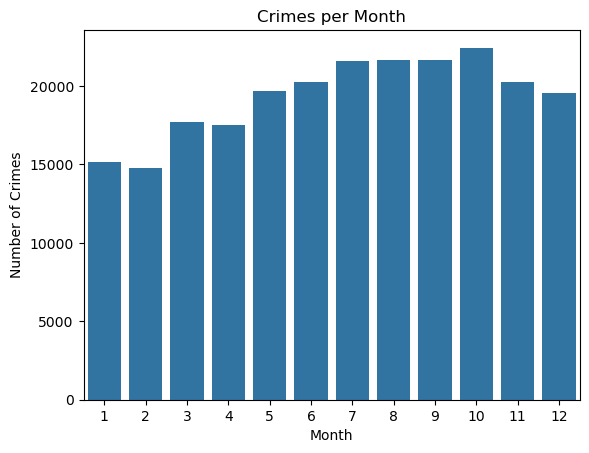

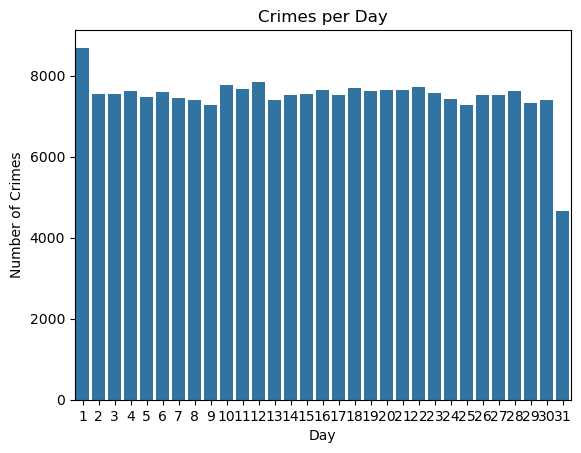

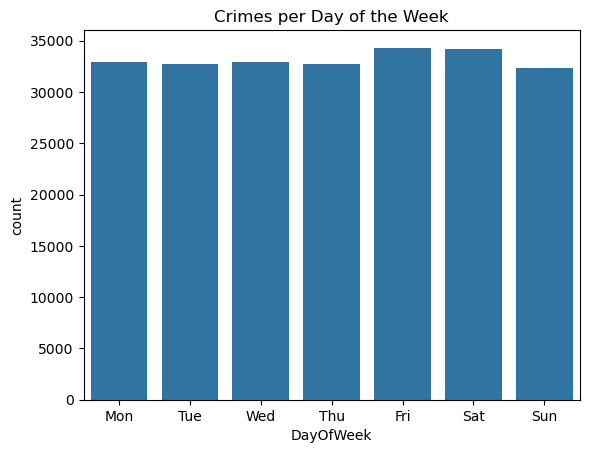

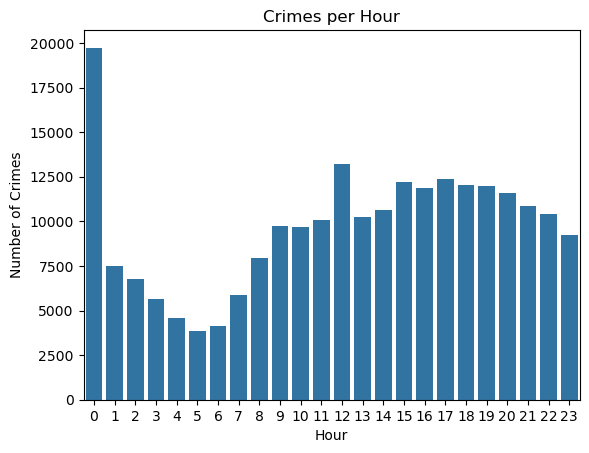

In [59]:
sns.countplot(x='Month', data=df)
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

sns.countplot(x='Day', data=df)
plt.title('Crimes per Day')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.show()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='DayOfWeek', data=df)
plt.xticks(ticks=range(7), labels=days)
plt.title('Crimes per Day of the Week')
plt.show()

sns.countplot(x='Hour', data=df)
plt.title('Crimes per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

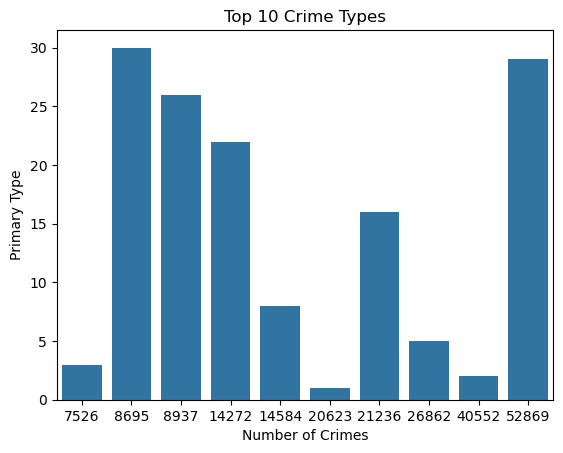

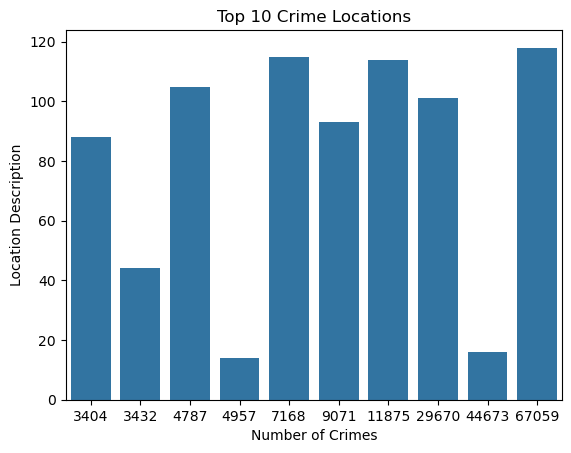

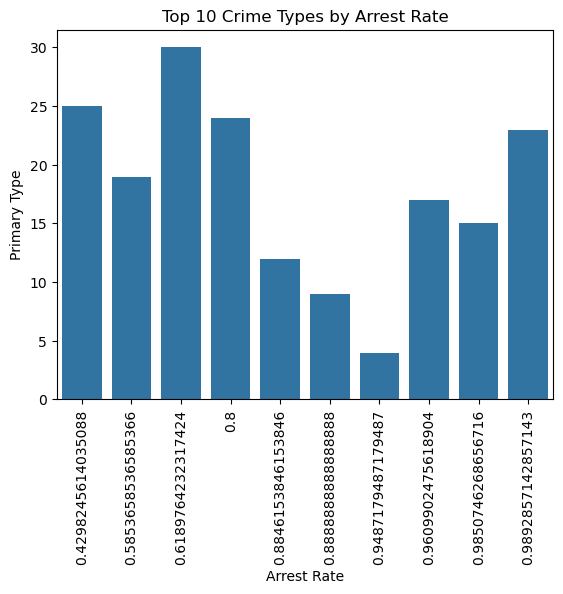

In [60]:
top_types = df['Primary Type'].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Crimes')
plt.show()

top_locs = df['Location Description'].value_counts().head(10)
sns.barplot(x=top_locs.values, y=top_locs.index)
plt.title('Top 10 Crime Locations')
plt.xlabel('Number of Crimes')
plt.show()

arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=arrest_rate.values, y=arrest_rate.index)
plt.title('Top 10 Crime Types by Arrest Rate')
plt.xlabel('Arrest Rate')
plt.xticks(rotation=90)
plt.show()


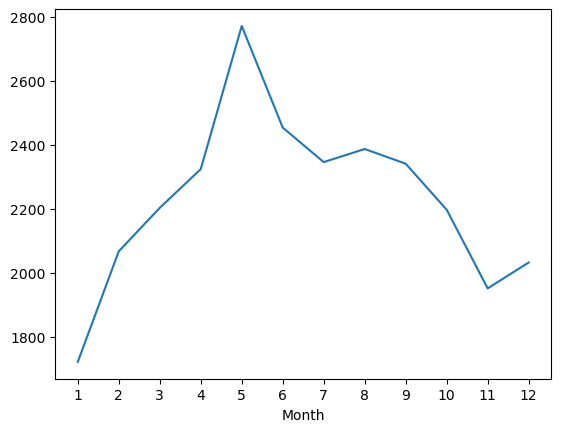

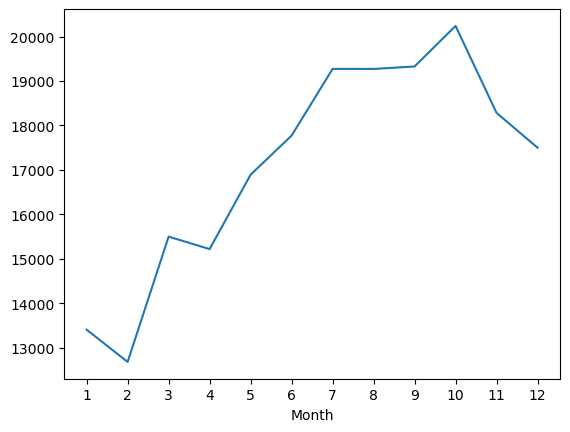

In [61]:
data = df[df['Arrest'] == 1].groupby('Month').size().reindex(range(1, 13), fill_value=0)
data.plot()
plt.xticks(range(1, 13))
plt.show()

data = df[df['Arrest'] == 0].groupby('Month').size().reindex(range(1, 13), fill_value=0)
data.plot()
plt.xticks(range(1, 13))  # Show all month numbers from 1 to 12
plt.show()


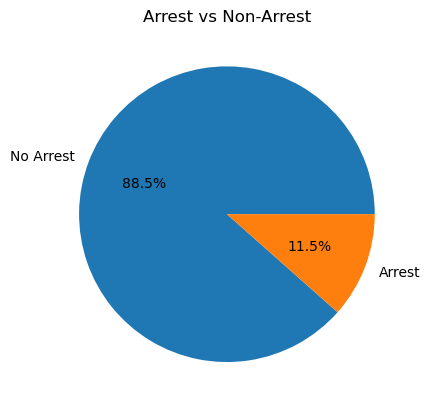

Arrest
0    205351
1     26795
Name: count, dtype: int64

In [62]:
df['Arrest'].value_counts().plot.pie(labels=['No Arrest', 'Arrest'], autopct='%1.1f%%')
plt.title('Arrest vs Non-Arrest')
plt.ylabel('')  # Optional: remove y-axis label
plt.show()
df['Arrest'].value_counts()
#unbalanced

In [63]:
###########################################################################################################################

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalerBeat = StandardScaler()
numerical_cols = [ 'Latitude', 'Longitude','Beat']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [65]:
corelation =  df.select_dtypes(include='number').corr()
corelation

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Day,DayOfWeek,Hour
IUCR,1.000000,0.292100,0.030079,-0.101606,0.052949,0.016336,0.016310,0.026052,-0.048285,0.047003,0.034147,0.026675,0.011989,0.000216,0.045405
Primary Type,0.292100,1.000000,0.157364,0.040869,-0.278236,0.037268,0.037274,0.051639,-0.076531,0.075588,0.010264,0.016318,0.000581,-0.014043,0.039635
Location Description,0.030079,0.157364,1.000000,0.038507,-0.258044,0.015648,0.015648,0.001263,0.038947,-0.043972,-0.032374,0.049181,0.005781,-0.003905,0.053879
Arrest,-0.101606,0.040869,0.038507,1.000000,0.016293,0.001149,0.001023,0.011022,-0.011161,0.005255,-0.034792,-0.034852,0.005118,0.004044,0.068785
Domestic,0.052949,-0.278236,-0.258044,0.016293,1.000000,-0.064495,-0.064550,-0.082751,0.108104,-0.118179,0.005571,-0.047193,-0.000320,0.028053,-0.026866
Beat,0.016336,0.037268,0.015648,0.001149,-0.064495,1.000000,0.999877,0.666185,-0.500150,0.639117,-0.552699,0.008995,-0.003711,0.003377,-0.000348
District,0.016310,0.037274,0.015648,0.001023,-0.064550,0.999877,1.000000,0.667287,-0.500290,0.640374,-0.554307,0.009032,-0.003773,0.003215,-0.000324
Ward,0.026052,0.051639,0.001263,0.011022,-0.082751,0.666185,0.667287,1.000000,-0.543197,0.671433,-0.456415,0.005663,0.000377,0.003614,0.004280
Community Area,-0.048285,-0.076531,0.038947,-0.011161,0.108104,-0.500150,-0.500290,-0.543197,1.000000,-0.796126,0.281673,-0.008438,0.000875,-0.010857,-0.006392
Latitude,0.047003,0.075588,-0.043972,0.005255,-0.118179,0.639117,0.640374,0.671433,-0.796126,1.000000,-0.524974,0.006955,-0.002470,0.002388,0.006424


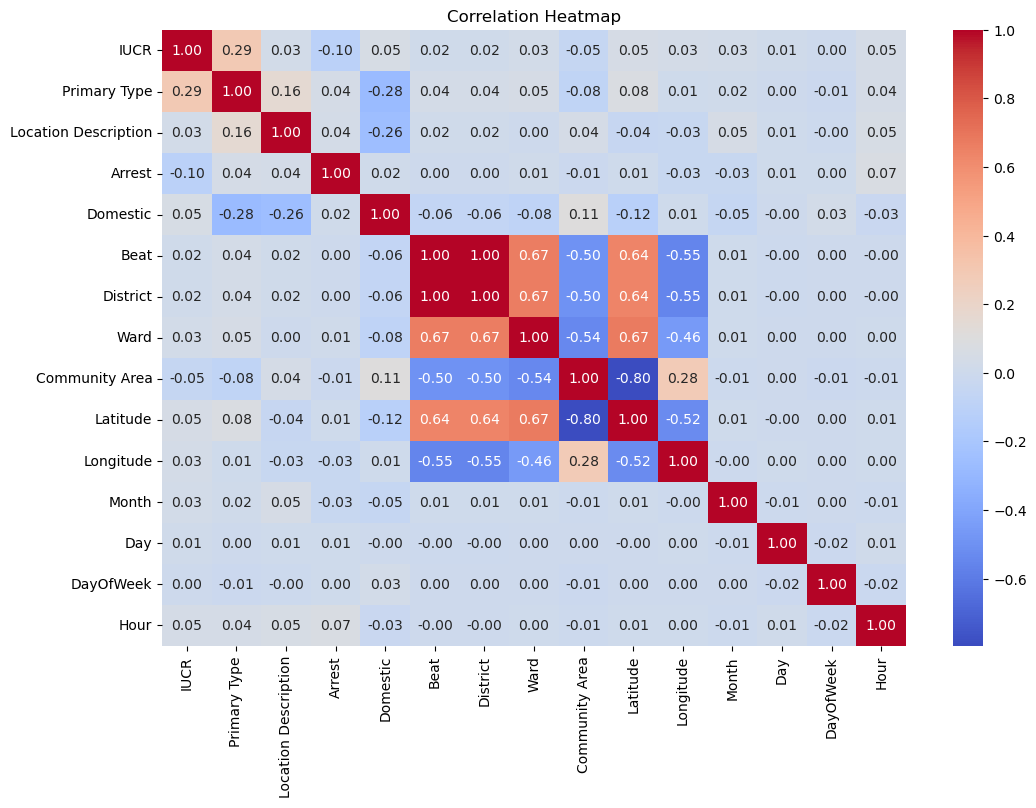

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [67]:
df.drop(columns=['District'], inplace=True)

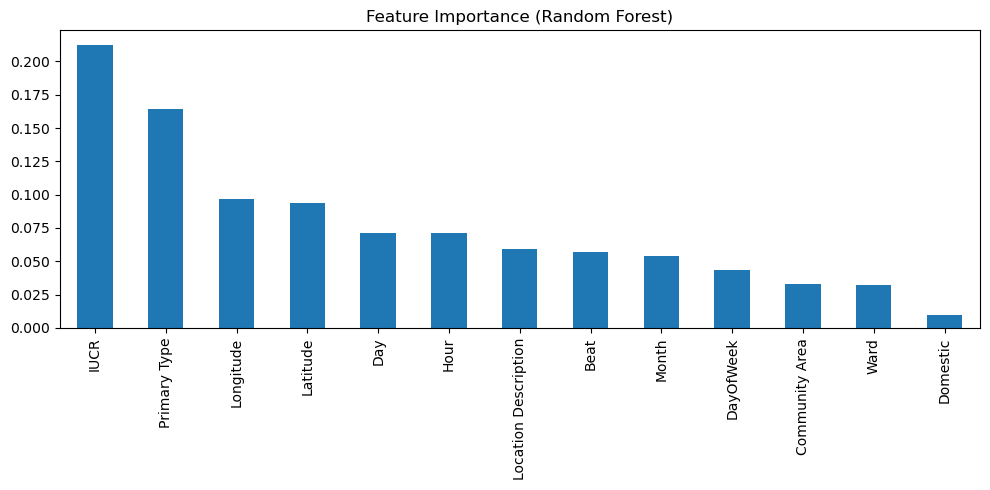

In [69]:
from sklearn.ensemble import RandomForestClassifier

x = df.drop(columns=['Arrest']) 
y = df['Arrest']        
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get importances
importances = model.feature_importances_
feature_names = x.columns

# Plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance (Random Forest)', figsize=(10, 5))
plt.tight_layout()
plt.show()


In [70]:
# Indicates if the crime was domestic-relatedI think it can affect whether an arrest was made or not
df.drop(columns=["Community Area","Ward"], inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232146 entries, 0 to 232153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   IUCR                  232146 non-null  int32  
 1   Primary Type          232146 non-null  int32  
 2   Location Description  232146 non-null  int32  
 3   Arrest                232146 non-null  int32  
 4   Domestic              232146 non-null  int32  
 5   Beat                  232146 non-null  float64
 6   Latitude              232146 non-null  float64
 7   Longitude             232146 non-null  float64
 8   Month                 232146 non-null  int32  
 9   Day                   232146 non-null  int32  
 10  DayOfWeek             232146 non-null  int32  
 11  Hour                  232146 non-null  int32  
dtypes: float64(3), int32(9)
memory usage: 15.1 MB


In [ ]:
df['Primary Type'] = le_primary.inverse_transform(df['Primary Type'])
df['Location Description'] = le_location.inverse_transform(df['Location Description'])
df['IUCR'] = le_iucr.inverse_transform(df['IUCR'])
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

df.to_csv('Crime_processed_no_outliers.csv', index=False)
import os
print(os.path.abspath("processed2_data.csv"))
 

c:\Users\amral\Downloads\Crime_Prediction_in_Chicago\processed2_data.csv
